In [3]:
import pandas as pd
df=pd.read_csv("employee_salary_data.csv")
df

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
...,...,...,...,...,...,...,...
995,995,995,O,33,7,7,2996
996,996,996,O,21,1,2,667
997,997,997,O,49,9,7,4158
998,998,998,AB,56,6,7,2414


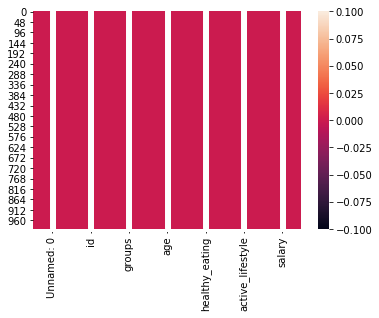

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [9]:
df.isnull().sum()

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [11]:
df.dtypes

Unnamed: 0           int64
id                   int64
groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
salary               int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['groups']=le.fit_transform(df['groups'])


In [16]:
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,0,36,5,5,2297
1,1,1,0,55,3,5,1134
2,2,2,0,61,8,1,4969
3,3,3,3,29,3,6,902
4,4,4,3,34,6,2,3574


In [17]:
df.skew()

Unnamed: 0          0.000000
id                  0.000000
groups              0.000000
age                -0.023806
healthy_eating      0.000047
active_lifestyle   -0.308004
salary              0.491404
dtype: float64

In [18]:
x=df.iloc[:,2:-1]

In [19]:
x.head()

,groups,age,healthy_eating,active_lifestyle
0,0,36,5,5
1,0,55,3,5
2,0,61,8,1
3,3,29,3,6
4,3,34,6,2


In [20]:
y=df.iloc[:,-1]

In [21]:
y.head()

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64

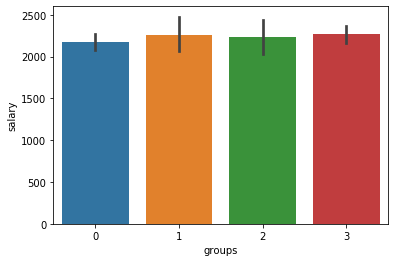

In [22]:
import seaborn as sns
sns.barplot(x='groups',y='salary',data=df)

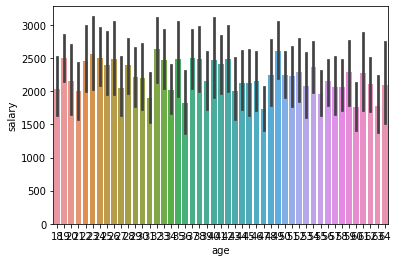

In [23]:
sns.barplot(x='age',y='salary',data=df)

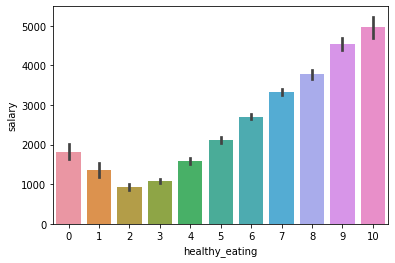

In [24]:
sns.barplot(x='healthy_eating',y='salary',data=df)

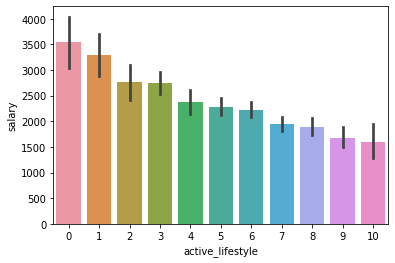

In [25]:
sns.barplot(x='active_lifestyle',y='salary',data=df)

In [26]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_new=df.loc[(zscore<3).all(axis=1)]
print(df_new.shape)

(1000, 7)
(999, 7)


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.13389342, -0.38309303,  0.02783053, -0.3335674 ],
       [-1.13389342,  1.02888904, -0.96611687, -0.3335674 ],
       [-1.13389342,  1.47477811,  1.51875162, -2.28711   ],
       ...,
       [ 1.13389342,  0.58299996,  2.01572532,  0.6432039 ],
       [-0.37796447,  1.10320388,  0.52480423,  0.6432039 ],
       [ 0.37796447,  1.69772265, -0.46914317,  1.6199752 ]])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score correspoinding to r_state",r_state ,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print(final_r_state)
print(max_r_score)

r2 score correspoinding to r_state 42 is 0.9068662862716251
r2 score correspoinding to r_state 43 is 0.8836583202373223
r2 score correspoinding to r_state 44 is 0.8631545099888636
r2 score correspoinding to r_state 45 is 0.8179065475207432
r2 score correspoinding to r_state 46 is 0.9210899362317775
r2 score correspoinding to r_state 47 is 0.8618557278623568
r2 score correspoinding to r_state 48 is 0.8627554327996082
r2 score correspoinding to r_state 49 is 0.8795096344576979
r2 score correspoinding to r_state 50 is 0.831488903110273
r2 score correspoinding to r_state 51 is 0.7950448789468861
r2 score correspoinding to r_state 52 is 0.7886050344791371
r2 score correspoinding to r_state 53 is 0.8335947191733215
r2 score correspoinding to r_state 54 is 0.893249648843652
r2 score correspoinding to r_state 55 is 0.8144414004515826
r2 score correspoinding to r_state 56 is 0.8336890979334864
r2 score correspoinding to r_state 57 is 0.86614575656623
r2 score correspoinding to r_state 58 is 0.8

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=67)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
import numpy as np
from sklearn.metrics import r2_score
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean absolute error: 233.16886024732514
Mean squared error: 89935.93942409955
Root Mean squared error: 299.8932133678579
r2_score: 0.9298173587175396


In [30]:
lr.coef_

array([   2.97705667,   -9.84930088,  912.39104165, -360.88837522])

In [31]:
lr.intercept_


2234.7868978103975

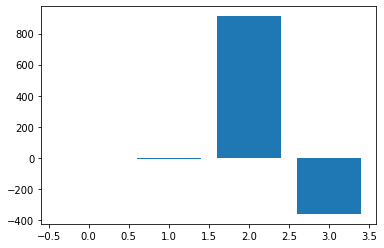

In [34]:
x=pd.DataFrame(data=x)
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_
plt.bar(x.columns,ls.coef_)
plt.show()

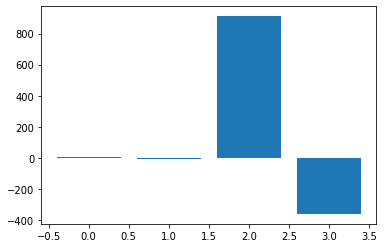

In [35]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_
plt.bar(x.columns,rd.coef_)
plt.show()

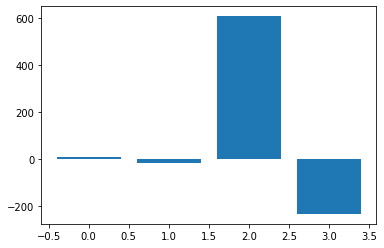

In [36]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
enr.fit(x_train,y_train)
enr.score(x_train,y_train)
enr.coef_
plt.bar(x.columns,enr.coef_)
plt.show()

In [37]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.6386970274945742
0.1759869944701582
0.07374822218682131


In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
alphavalue={'alpha':[1,0.1,0.01,0.0001,0.001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.0001, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8272147328252819
1
{'alpha': 1}


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
alphavalue={'alpha':[1,0.1,0.01,0.0001,0.001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.0001, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8271821303490906
1
{'alpha': 1}


In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=45)
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))



0.9984685732521102


In [48]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(n_estimators=50)
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))

0.9356905857149096


In [49]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),Ridge(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print(score.mean())
    print(score.std())

[0.91458252 0.82611716 0.8530566  0.83756272 0.82584994 0.82219113
 0.87058874 0.90409552]
0.8567555397048627
0.033998167127413804
[0.91438865 0.82634977 0.85308783 0.83752953 0.8259342  0.82227722
 0.87038732 0.90402651]
0.8567476280089754
0.033890001504997734
[0.91437386 0.8262274  0.85307838 0.83754759 0.82593428 0.82231988
 0.87058935 0.90400063]
0.8567589223051773
0.033899745229297965
[0.99267324 0.99493241 0.99607615 0.9963474  0.99724975 0.99715707
 0.99952972 0.99638725]
0.9962941249607582
0.0018422506673073202
[0.90712094 0.90542064 0.91086174 0.91717817 0.89144921 0.92448716
 0.92849837 0.92749216]
0.9140635490569742
0.011997937430740383


In [ ]:
#as per analysis RandomForestReagressor has cross_val_score

In [50]:
from sklearn.externals import joblib
joblib.dump(rfr,'rfr.salary.pkl')

['rfr.salary.pkl']